In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 77.2 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Point
from shapely import wkt
import numpy as np
import shapely
from shapely.geometry import shape
from shapely.geometry import Point, box
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Mount on the Google Drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = "/content/drive/My Drive/MOSAIKS/Explore-Satellite-Feature-Extraction-for-/"
os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['conx-3.7.10',
 'hyperlocal temperature monitering with nta.csv',
 'conx-3.7.10.tar.gz.3',
 'conx-3.7.10.tar.gz',
 'conx-3.7.10.tar.gz.4',
 'conx-3.7.10.tar.gz.2',
 'conx-3.7.10.tar.gz.5',
 'conx-3.7.10.tar.gz.1',
 'LICENSE',
 'Distritos.prj',
 'Distritos.shp',
 'Distritos.shx',
 'Distritos.sbx',
 'README.md',
 'Distritos.sbn',
 'Distritos.dbf',
 'spatial_joined_data',
 '.ipynb_checkpoints',
 '.git',
 'NYC.shx',
 'NYC.cpg',
 'NYC.shp',
 'NYC.qmd',
 'NYC.dbf',
 'NYC.prj',
 'T18TWK_20231221T155651_TCI_10m.tif',
 'nyc_satellite_image.png',
 'Fetching Satellite image of NYC.ipynb',
 'tile_1.png',
 'tile_2.png',
 'tile_3.png',
 'tile_4.png',
 'tile_5.png',
 'tile_6.png',
 'tile_7.png',
 'tile_8.png',
 'tile_9.png',
 'tile_10.png',
 'tile_11.png',
 'tile_12.png',
 'tile_13.png',
 'tile_14.png',
 'tile_15.png',
 'tile_16.png',
 'tile_17.png',
 'tile300step_0.png',
 'tile_0.png',
 'sentinel-2-l2a-example.ipynb',
 'T18TWK_20190801T153911_TCI_10m.tif',
 '2024.6.23.df5-9-scores_cluster2.csv',
 '

In [ ]:
# Read in shapefile of Madrid with district boundaries
db = gpd.read_file('NYC.shp')
# Set local crs in m
db = db.to_crs(32618)

In [ ]:
# Initialize grid_list
grid_list = []


# Create grids to patch image
# Change the step size to change sizes
# Set the initial CRS and step size
crs = '32618'
initial_step = 100
final_step = 400
step_increase = 100


# Loop through step sizes
for STEP in range(initial_step, final_step + 1, step_increase):
    # Total bounds of the original GeoDataFrame (assuming it's called db)
    a, b, c, d = db.total_bounds

    # Create a grid for geometry
    gdf_grid = gpd.GeoDataFrame(
        geometry=[
            shapely.geometry.box(minx, miny, maxx, maxy)
            for minx, maxx in zip(np.arange(a, c, STEP), np.arange(a, c, STEP)[1:])
            for miny, maxy in zip(np.arange(b, d, STEP), np.arange(b, d, STEP)[1:])
        ],
        crs=crs,
    ).to_crs(db.crs)

    # Append the current GeoDataFrame to the list
    grid_list.append(gdf_grid)


In [ ]:
grid_list[0]

,geometry
0,"POLYGON ((563543.767 4483076.377, 563543.767 4..."
1,"POLYGON ((563543.767 4483576.377, 563543.767 4..."
2,"POLYGON ((563543.767 4484076.377, 563543.767 4..."
3,"POLYGON ((563543.767 4484576.377, 563543.767 4..."
4,"POLYGON ((563543.767 4485076.377, 563543.767 4..."
...,...
8644,"POLYGON ((609543.767 4527076.377, 609543.767 4..."
8645,"POLYGON ((609543.767 4527576.377, 609543.767 4..."
8646,"POLYGON ((609543.767 4528076.377, 609543.767 4..."
8647,"POLYGON ((609543.767 4528576.377, 609543.767 4..."


In [ ]:


# Read in shapefile of Madrid with district boundaries
db = gpd.read_file('NYC.shp')
# Set local crs in m
db = db.to_crs(32618)

for i in range(4):
  # Ensure the GeoDataFrame has a CRS
  grid_list[i].set_crs(epsg=32618, inplace=True, allow_override=True)

  # Plotting the polygons
  fig, ax = plt.subplots(figsize=(15, 15))  # Adjust the figure size as needed

  # Plot the polygons
  grid_list[i].plot(ax=ax, edgecolor='black', facecolor='none',linewidth=0.2)
  db.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)

  # Set plot title and labels
  ax.set_title('Grid for Satellite Image Fetching')
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.axis('off')

  # Display the plot
  plt.show()

  # plt.savefig('grid_polygons_plot.png', dpi=300)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the shapefile of New York City with district boundaries
db = gpd.read_file('NYC.shp')

# Ensure the shapefile has a CRS in meters (UTM Zone 18N)
db = db.to_crs(32618)

# Assume grid_list is already defined and contains the grids
for i in range(4):
    # Ensure the GeoDataFrame has a CRS
    grid_list[i].set_crs(epsg=32618, inplace=True, allow_override=True)

    # Intersect the grid with the NYC boundary to mask out areas outside NYC
    grid_within_nyc = gpd.overlay(grid_list[i], db, how='intersection')

    # Plotting the polygons
    fig, ax = plt.subplots(figsize=(15, 15))  # Adjust the figure size as needed

    # Plot the polygons
    grid_within_nyc.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.02)
    db.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)

    # Set plot title and labels
    ax.set_title(f'Grid for Satellite Image Fetching within NYC Boundaries, Grid Width = {i*100 + 100}m')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.axis('off')

    # Display the plot
    plt.show()

    # Optionally save the plot
    # plt.savefig(f'grid_polygons_plot_{i}.png', dpi=300)


Output hidden; open in https://colab.research.google.com to view.

# For temperature join

In [ ]:
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
from rasterio.warp import calculate_default_transform, reproject, Resampling


# Path to the original raster file
raster_path = 'f_deviation_smooth.tif'
reprojected_raster_path = 'f_deviation_smooth_32618.tif'

# Open the original raster
with rasterio.open(raster_path) as src:
    # Define the target CRS
    dst_crs = 'EPSG:32618'

    # Calculate the transform and dimensions of the reprojected raster
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    # Update the metadata
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Reproject and save to a new file
    with rasterio.open(reprojected_raster_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

# Load the reprojected raster file
raster = rasterio.open(reprojected_raster_path)

# Ensure the GeoDataFrames have a consistent CRS
for i in range(len(grid_list)):
    grid_list[i] = grid_list[i].to_crs(32618)

# Function to calculate the average temperature in each grid
def calculate_average_temperature(grid, raster):
    try:
        # Mask the raster with the grid geometry
        out_image, out_transform = mask(raster, [grid.geometry], crop=True)
        # Convert the masked array to a numpy array and flatten it
        out_image = out_image[0]  # assuming the raster has a single band
        out_image = out_image[out_image != raster.nodata]  # remove no-data values
        # Calculate the average temperature
        if out_image.size > 0:
            return np.mean(out_image)
        else:
            return np.nan
    except Exception as e:
        print(f"Error processing grid: {e}")
        return np.nan

# Calculate average temperatures for each grid and store in the grid_list
for gdf_grid in grid_list:
    gdf_grid['average_temperature'] = gdf_grid.apply(lambda row: calculate_average_temperature(row, raster), axis=1)





In [ ]:
grid_list

[                                                 geometry  average_temperature
 0       POLYGON ((563143.767 4483076.377, 563143.767 4...                  NaN
 1       POLYGON ((563143.767 4483176.377, 563143.767 4...                  NaN
 2       POLYGON ((563143.767 4483276.377, 563143.767 4...                  NaN
 3       POLYGON ((563143.767 4483376.377, 563143.767 4...                  NaN
 4       POLYGON ((563143.767 4483476.377, 563143.767 4...                  NaN
 ...                                                   ...                  ...
 218549  POLYGON ((609643.767 4529476.377, 609643.767 4...                  NaN
 218550  POLYGON ((609643.767 4529576.377, 609643.767 4...                  NaN
 218551  POLYGON ((609643.767 4529676.377, 609643.767 4...                  NaN
 218552  POLYGON ((609643.767 4529776.377, 609643.767 4...                  NaN
 218553  POLYGON ((609643.767 4529876.377, 609643.767 4...                  NaN
 
 [218554 rows x 2 columns],
          

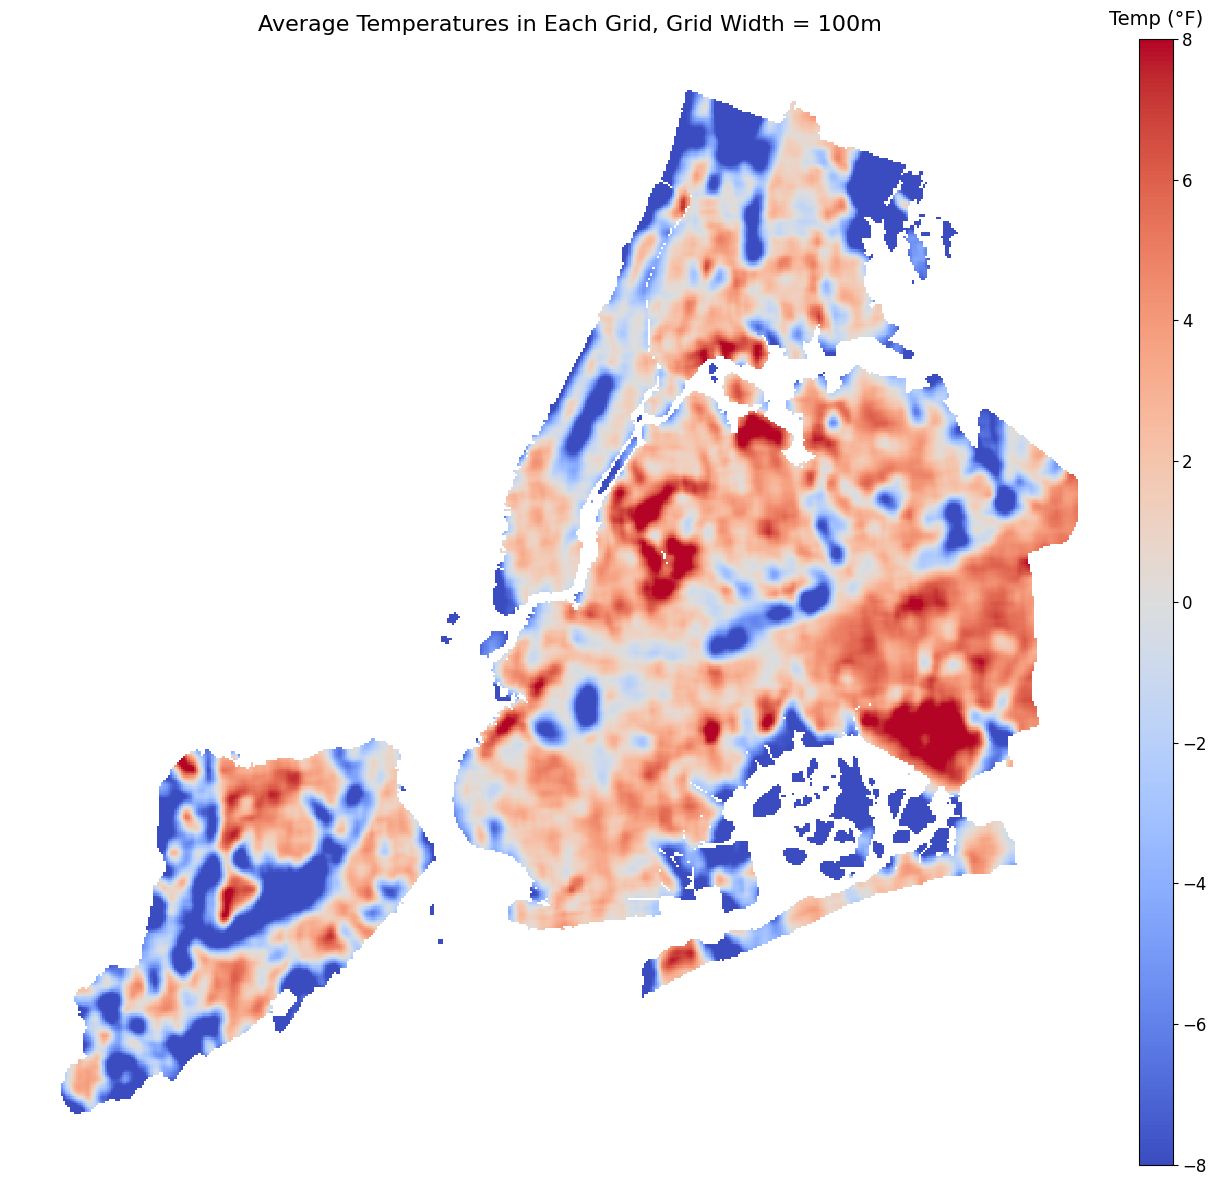

<Figure size 640x480 with 0 Axes>

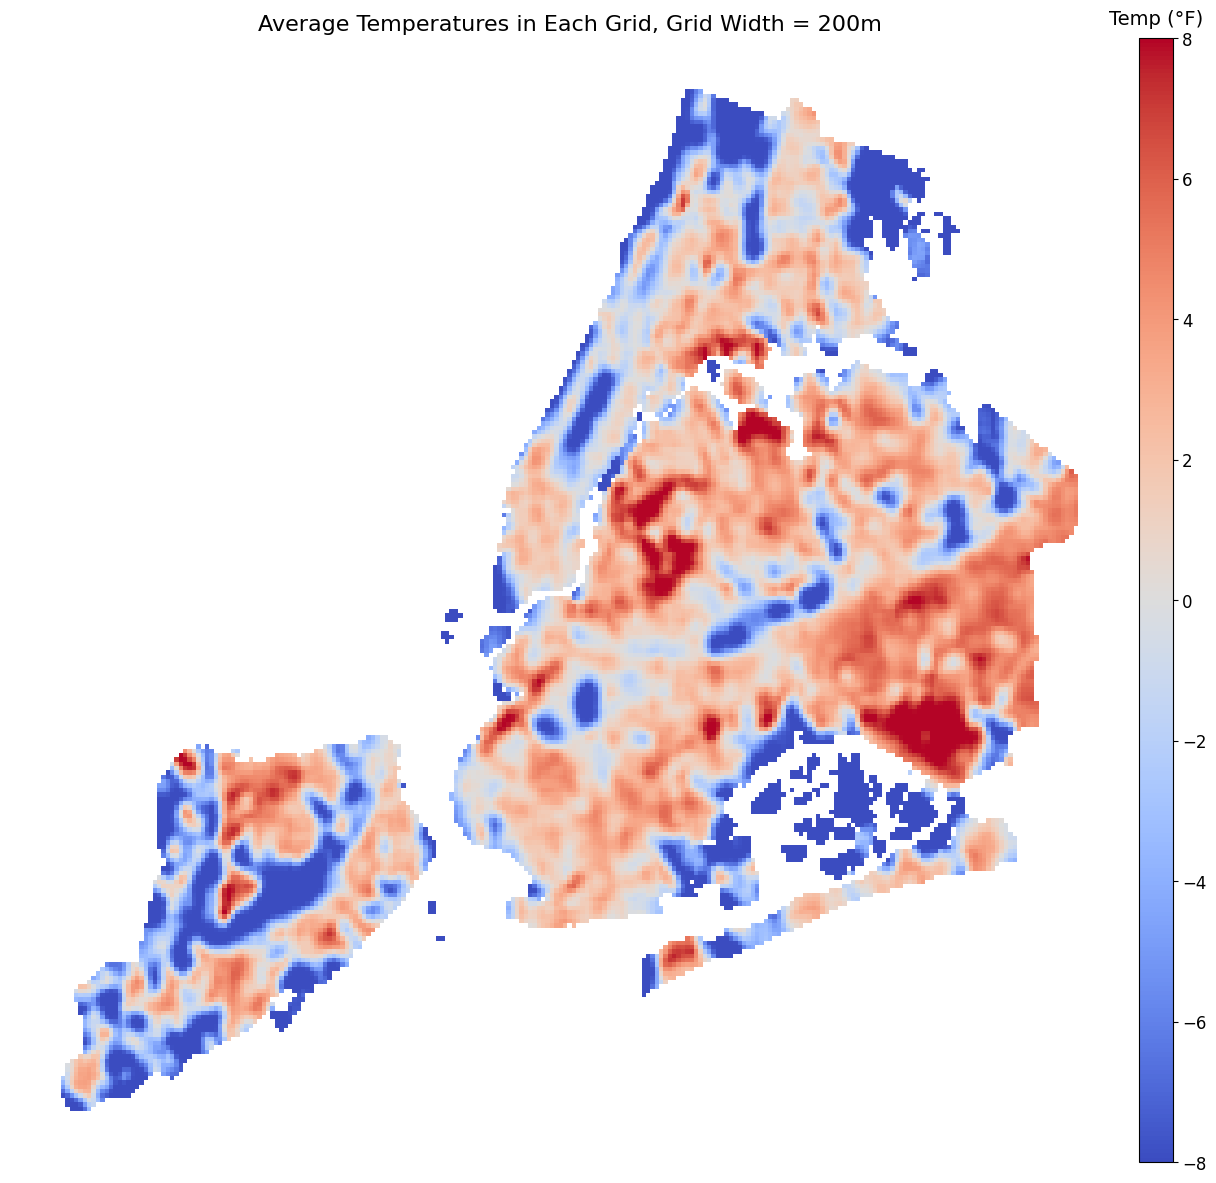

<Figure size 640x480 with 0 Axes>

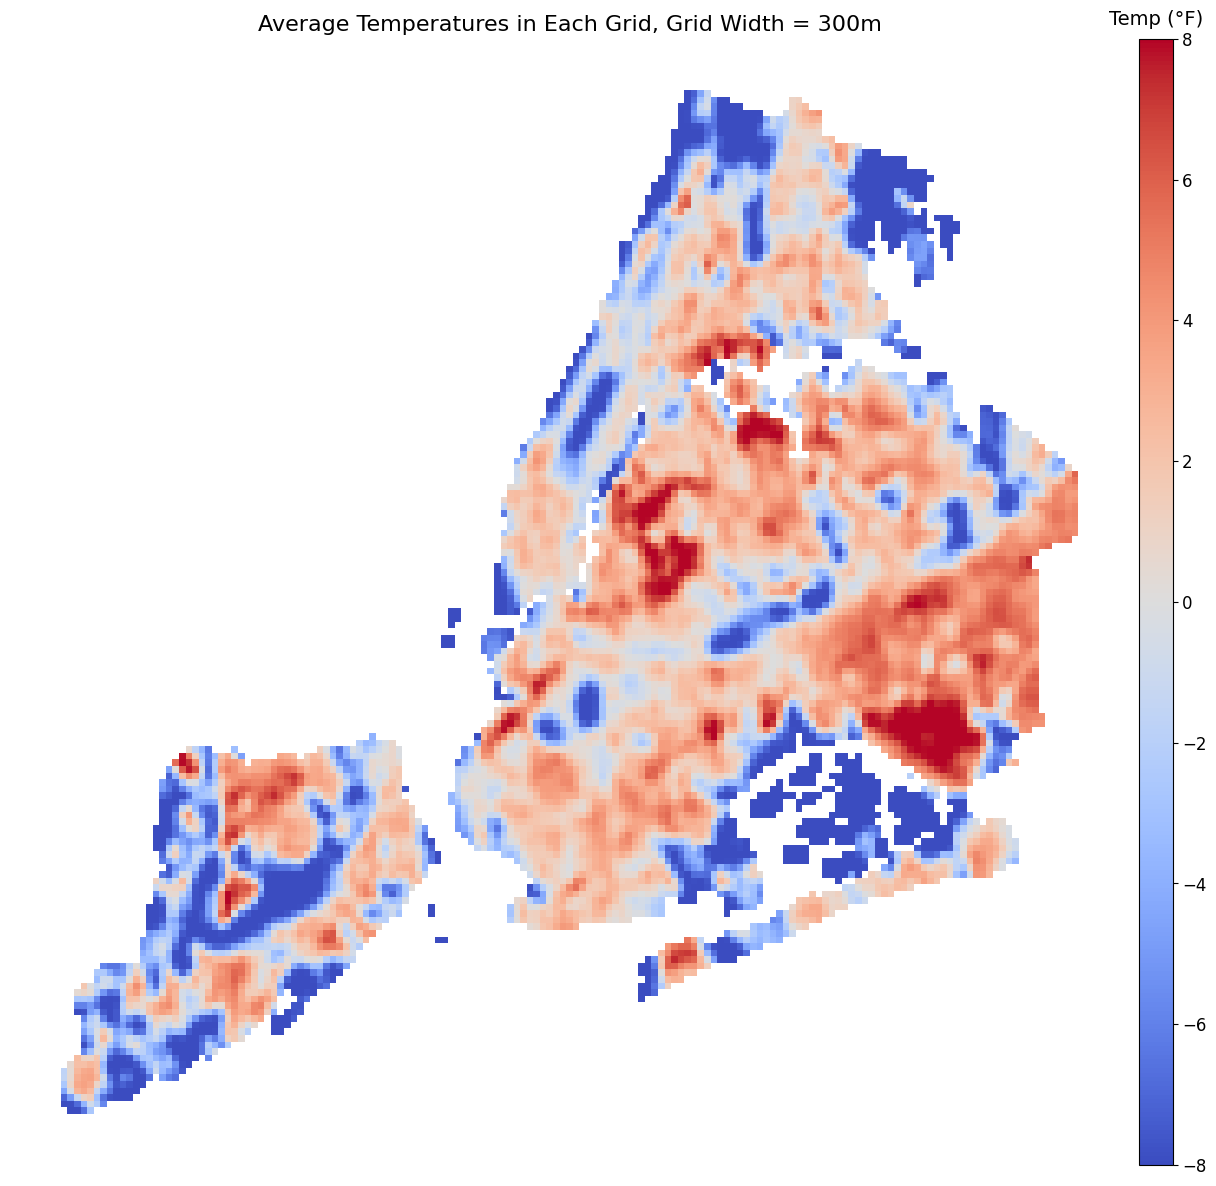

<Figure size 640x480 with 0 Axes>

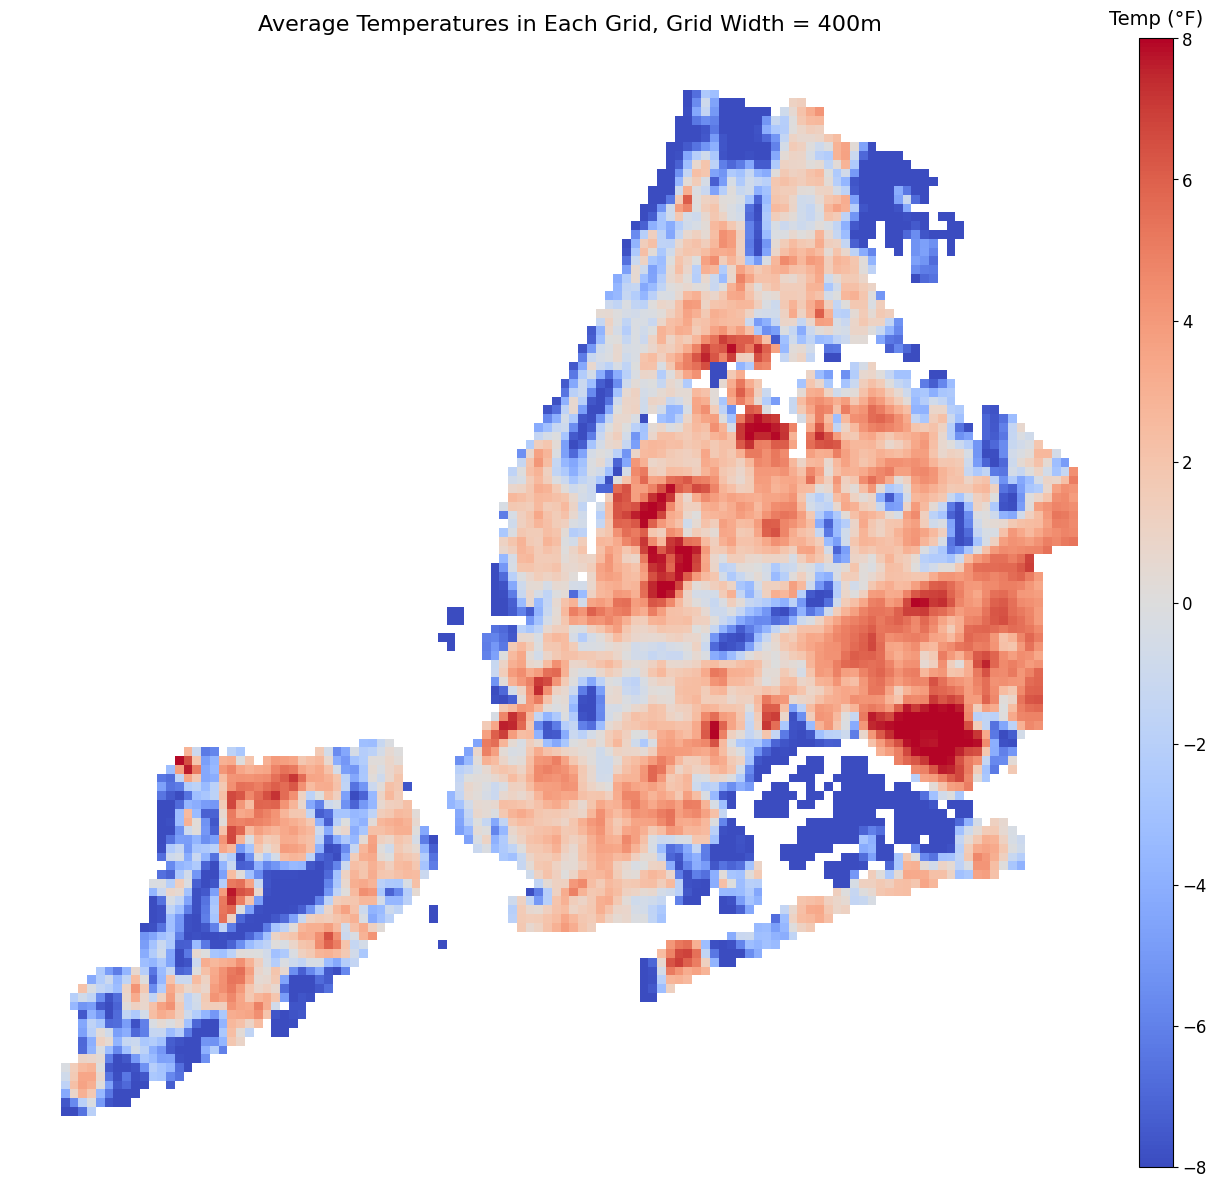

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib as mpl

# Plot the average temperatures for each grid
for i in range(4):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the grid with average temperature values
    grid_list[i].plot(column='average_temperature', ax=ax, cmap='coolwarm', legend=False)

    # Add a colorbar with a smaller size
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=grid_list[i]['average_temperature'].min(), vmax=grid_list[i]['average_temperature'].max()))
    sm._A = []  # Necessary for the ScalarMappable to work correctly
    cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)

    # Adjust the colorbar to be smaller
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.set_title('Temp (°F)', fontsize=14, pad=10)

    # Set the title and remove the axis
    ax.set_title(f'Average Temperatures in Each Grid, Grid Width = {i*100 + 100}m', fontsize=16)
    ax.axis('off')  # Remove the axis

    # Display the plot
    plt.show()

    # Save the plot
    plt.savefig(f'Average_Temperatures_in_Each_Grid_{i}.png', dpi=500, bbox_inches='tight', pad_inches=0)


In [ ]:
len(merged_dfs)

9

In [ ]:
# Calculate average temperatures for each grid and store in the grid_list
for idx, gdf_grid in enumerate(grid_list):
    # Save
    gdf_grid.to_csv(f'finer/spatial_joined_data_temperature/gridlist_{idx}_with_temperature.csv', index=False)